In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('kmeans.csv')
X.head()

,X1,X2
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2


In [3]:
X = X.values

In [4]:
C_x = [6.2, 6.6 ,6.5]
C_y = [3.2, 3.7, 3.0]

In [5]:
Centroid = np.array(list(zip(C_x, C_y)))
Centroid_old = np.zeros(Centroid.shape)
Centroid

array([[6.2, 3.2],
       [6.6, 3.7],
       [6.5, 3. ]])

In [6]:
clusters = np.zeros(len(X))
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
def euclidean(a,b, ax = 1):
    return np.linalg.norm(a-b, axis = ax)

In [8]:
error = euclidean(Centroid, Centroid_old, None)
print(error)

12.53714481052205


In [9]:
iterr = 0

In [10]:
k = 3
while error!=0:
    iterr = iterr+1
    for i in range(len(X)):
        distance = euclidean(X[i], Centroid)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    Centroid_old = deepcopy(Centroid)
    print("Old Centroid")
    print(Centroid_old)
    
    for p in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == p]
        Centroid[p] = np.mean(points, axis = 0)
        
    print("New Centroids",Centroid)
    error = euclidean(Centroid, Centroid_old, None)
    # print(error)
    print("Clusters = ",clusters)
    print("************")

Old Centroid
[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
New Centroids [[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
Clusters =  [0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
************
Old Centroid
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
New Centroids [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Clusters =  [2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
************
Old Centroid
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
New Centroids [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Clusters =  [2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
************


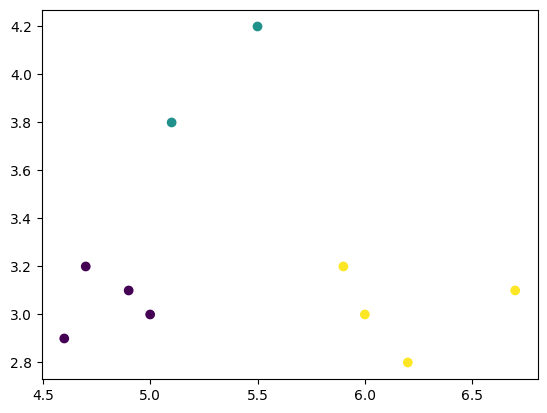

In [15]:
X = pd.read_csv('kmeans.csv')
plt.scatter(X["X1"], X["X2"], c = clusters)